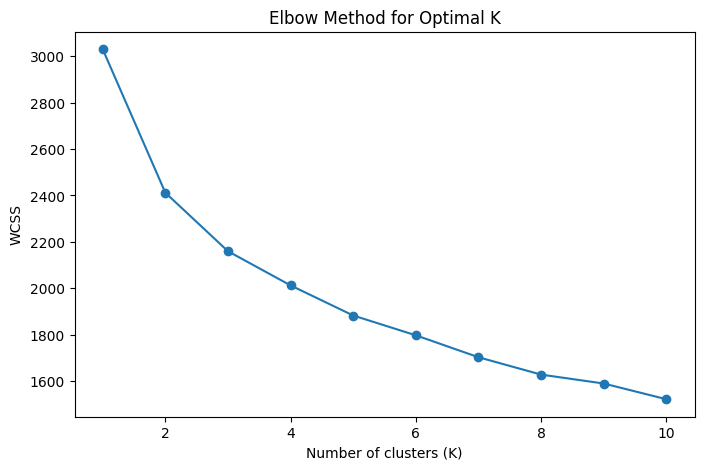

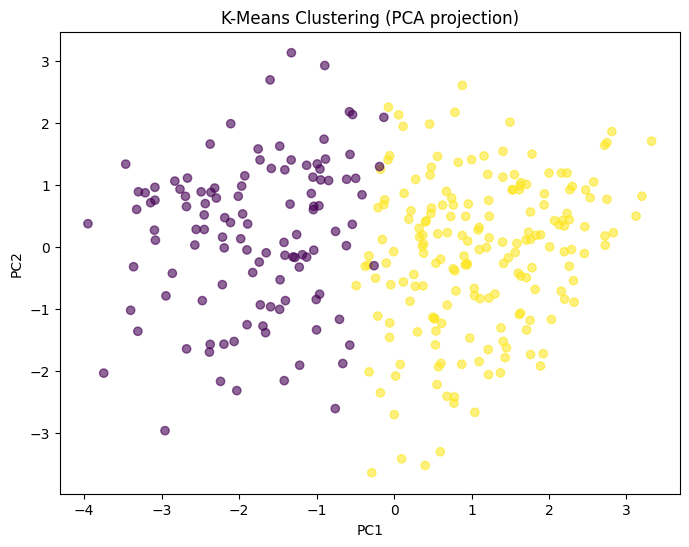

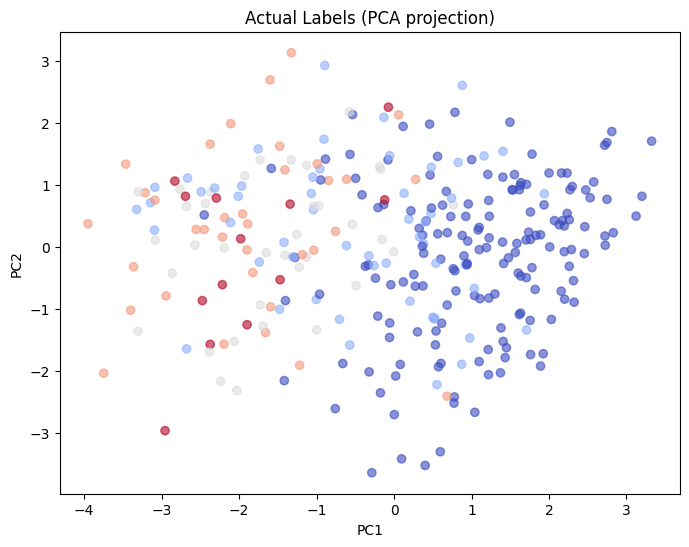

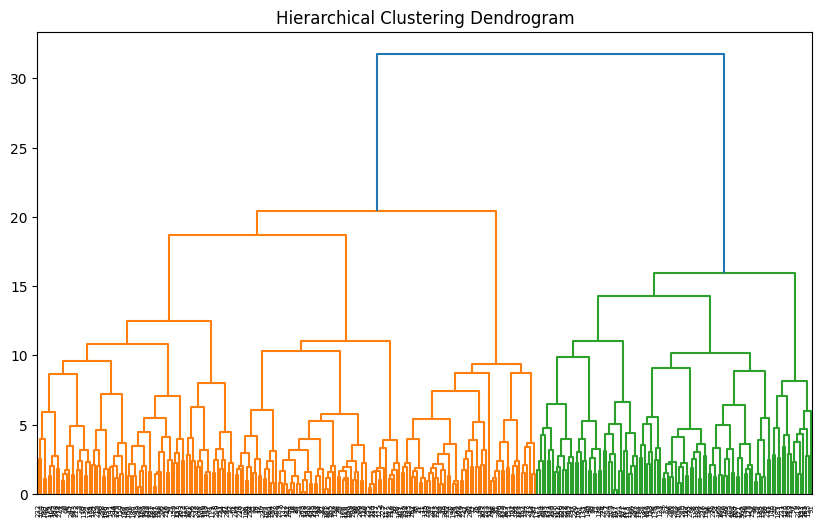

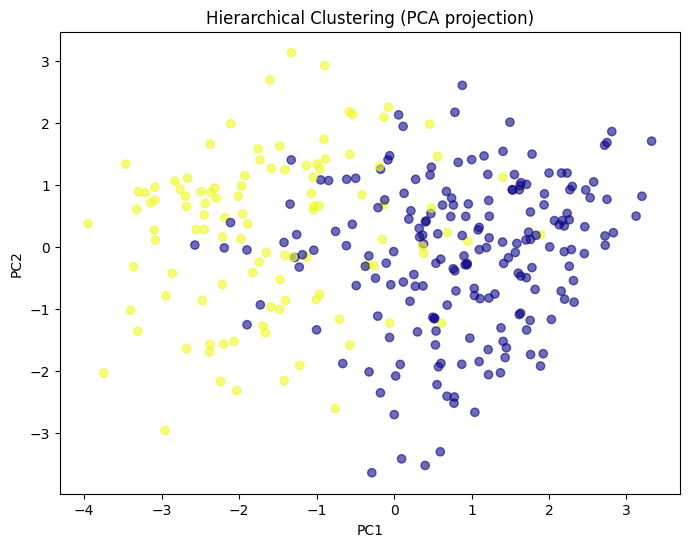

In [1]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# 2. Load dataset (we can use cleaned.csv or selected_features.csv)
df = pd.read_csv("../data/selected_features.csv")

X = df.drop("target", axis=1)
y = df["target"]

# 3. Use PCA (2D) for visualization only
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# ---------------------------------------------------
# K-Means Clustering
# ---------------------------------------------------

# 4. Elbow method to choose optimal K
wcss = []  # within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.show()

# 5. Train K-Means with chosen K (let's try K=2 because target has 2 classes)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters_kmeans = kmeans.fit_predict(X)

# Plot clusters (PCA 2D)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_kmeans, cmap="viridis", alpha=0.6)
plt.title("K-Means Clustering (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Compare with actual labels
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", alpha=0.6)
plt.title("Actual Labels (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# ---------------------------------------------------
# Hierarchical Clustering
# ---------------------------------------------------

# 6. Dendrogram
linked = linkage(X, method='ward')

plt.figure(figsize=(10,6))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# 7. Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward")
clusters_hc = hc.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_hc, cmap="plasma", alpha=0.6)
plt.title("Hierarchical Clustering (PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
